## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [1]:
import pandas as pd
from pathlib import Path
import datetime
import numpy as np
%matplotlib inline

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [2]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters

#import pandas as pd
#from pathlib import Path

csvpath = Path("./Resources/bitstamp.csv")
df_bitstamp = pd.read_csv(
    Path('./Resources/bitstamp.csv'), index_col ='Timestamp', parse_dates=True, infer_datetime_format=True)


### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [3]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
df_bitstamp.head()


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [4]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters

csvpath = Path("./Resources/coinbase.csv")
df_coinbase = pd.read_csv(
    Path('./Resources/coinbase.csv'), index_col ='Timestamp', parse_dates=True, infer_datetime_format=True)


In [5]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
df_coinbase.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [6]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
#checking if NaN values
df_bitstamp.isnull().sum()

Open              473
High              473
Low               473
Close               0
BTC Volume        473
USD Volume        473
Weighted Price    473
dtype: int64

In [7]:
#Review data has drop NaN values
df_bitstamp.dropna()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6935.01,6939.07,6922.56,$6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,$6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,$6934.72,28.239049,195789.408220,6933.286106


### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [8]:
# Use the str.replace function to remove the dollar sign, $
df_bitstamp.loc[:, "Close"] = df_bitstamp.loc[:, "Close"].str.replace("$","")
df_bitstamp

C:\Users\artur\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,13620.0,1.069665,14582.660932,13632.923329
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6935.01,6939.07,6922.56,6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,6934.72,28.239049,195789.408220,6933.286106


### Step 3: Convert the data type of the Close column to a `float`.

In [9]:
# Convert the Close data type to a float
df_bitstamp.loc[:, "Close"] = df_bitstamp.loc[:, "Close"].astype("float")
df_bitstamp.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [10]:
# Review the data for duplicate values, and drop them if necessary
df_bitstamp.duplicated().sum()

472

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [11]:
# Repeat Steps 1–4 for the coinbase DataFrame

# For the coinbase DataFrame, replace or drop all NaNs or missing values in the DataFrame
#df_coinbase.dropna()
df_coinbase.isnull().sum()

Open              218
High              218
Low               218
Close               0
BTC Volume        218
USD Volume        218
Weighted Price    218
dtype: int64

In [12]:
#Review that NaN values have drop
df_coinbase.dropna()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.085370,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.978010,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.196860,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.641820,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.269440,13574.719401
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6945.20,6948.06,6930.00,$6930.0,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,$6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,$6933.91,0.776431,5382.532162,6932.405747


In [13]:
#dollar sign removed from previous code
# Use the str.replace function to remove the dollar sign, $
df_coinbase.loc[:, "Close"] = df_coinbase.loc[:, "Close"].str.replace("$","")
df_coinbase
df_coinbase.head()

C:\Users\artur\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,13583.44,9.955364,135141.26944,13574.719401


In [14]:
# Convert the Close data type to a float
df_coinbase.loc[:, "Close"] = df_coinbase.loc[:, "Close"].astype("float")
df_coinbase.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

In [15]:
# Review the data for duplicate values, and drop them if necessary
df_coinbase.duplicated().sum()

217

## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [16]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame

df_bitstamp_sliced= df_bitstamp.iloc[:,[3]]


# Review the first five rows of the DataFrame
df_bitstamp_sliced.head()



,Close
Timestamp,
2018-01-01 00:00:00,13646.48
2018-01-01 00:01:00,13658.75
2018-01-01 00:02:00,13610.22
2018-01-01 00:03:00,13639.09
2018-01-01 00:04:00,13620.00


In [17]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
df_coinbase_sliced =df_coinbase.iloc[:,[3]]

# Review the first five rows of the DataFrame
df_coinbase_sliced.head()

,Close
Timestamp,
2018-01-01 00:00:00,13608.49
2018-01-01 00:01:00,13601.66
2018-01-01 00:02:00,13580.00
2018-01-01 00:03:00,13550.34
2018-01-01 00:04:00,13583.44


### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [18]:
# Generate the summary statistics for the bitstamp DataFrame
df_bitstamp_sliced.describe()

,Close
count,129067.000000
mean,10459.842453
std,2315.976088
min,5944.000000
25%,8613.370000
50%,10145.950000
75%,11444.810000
max,17234.980000


In [19]:
# Generate the summary statistics for the coinbase DataFrame
df_coinbase_sliced.describe()

,Close
count,129322.000000
mean,10449.140958
std,2317.197419
min,5882.310000
25%,8609.230000
50%,10137.440000
75%,11397.237500
max,17177.990000


<AxesSubplot:title={'center':'Bitstamp'}, xlabel='Timestamp', ylabel='Price'>

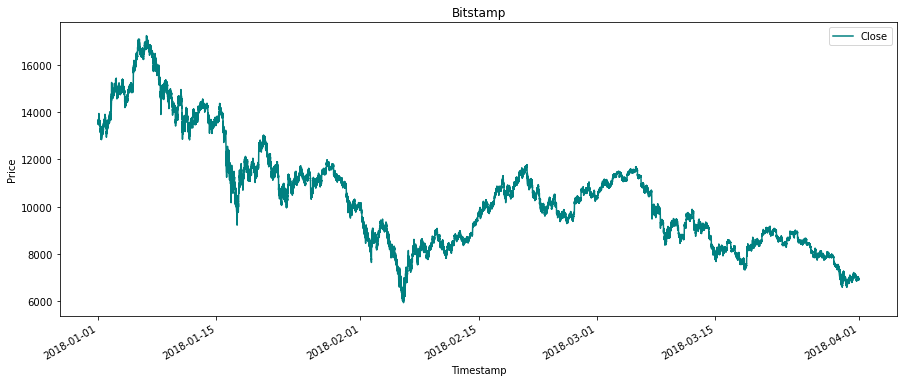

In [20]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization

df_bitstamp_sliced.plot.line(figsize=(15, 6), title="Bitstamp", color='teal',ylabel="Price")



<AxesSubplot:title={'center':'Coinbase'}, xlabel='Timestamp', ylabel='Price'>

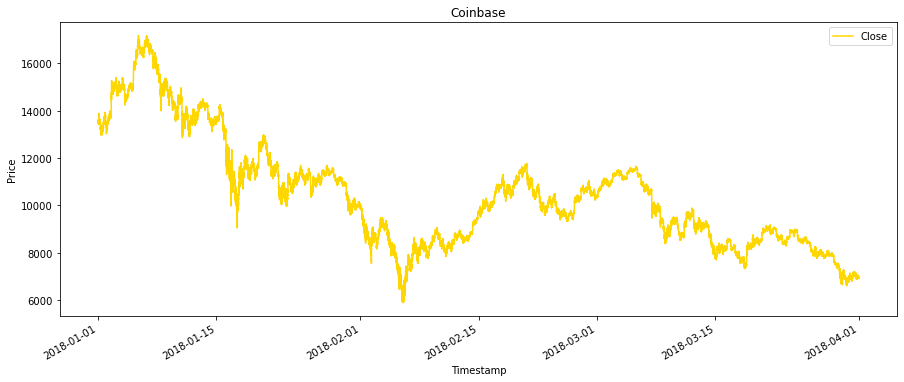

In [21]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
df_coinbase_sliced.plot.line(figsize=(15, 6), title="Coinbase", color='gold',ylabel="Price")

<AxesSubplot:title={'center':'Bitstamp VS Coinbase'}, xlabel='Timestamp', ylabel='Price'>

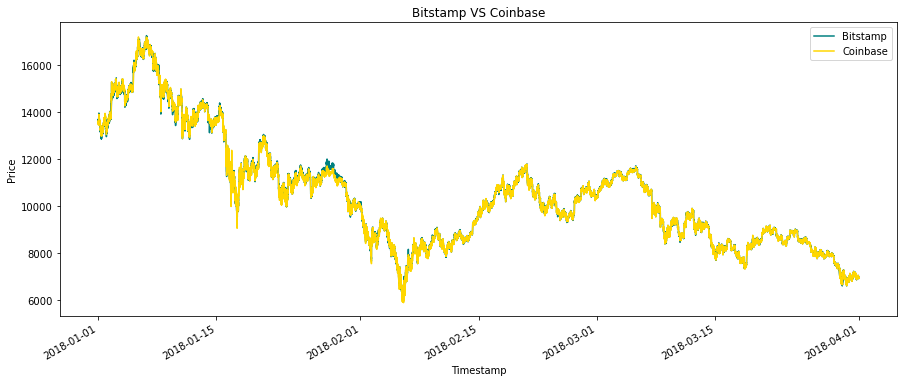

In [22]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label

df_bitstamp_sliced['Close'].plot(legend=True, figsize=(15, 6), title="Bitstamp VS Coinbase", color='teal',label="Bitstamp")

df_coinbase_sliced['Close'].plot(legend=True, figsize=(15, 6), color='gold',label="Coinbase",ylabel="Price")


#The graphs are very similar, multiple points overlap.

<AxesSubplot:title={'center':'January 2018- Bitstamp VS Coinbase'}, xlabel='Date', ylabel='Price'>

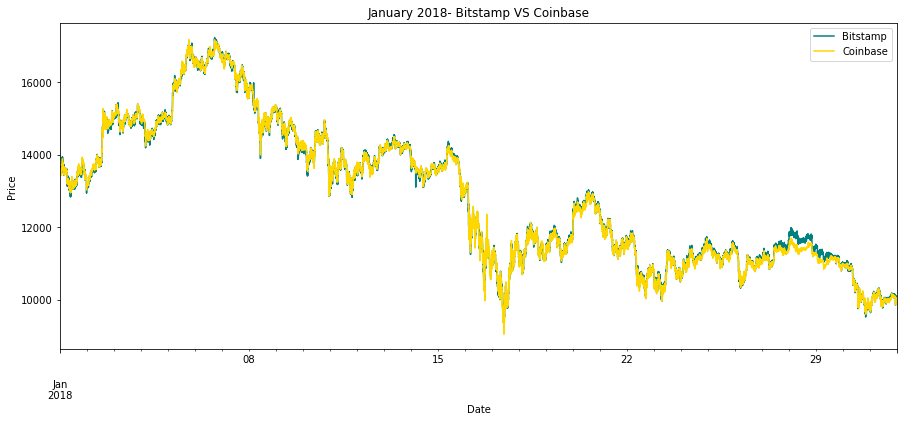

In [23]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label

# plot code was moved to fit the screen

df_bitstamp_sliced['Close'].loc['2018-01-01' :'2018-01-31'].plot(legend=True, 
                                                                 figsize=(15, 6), 
                                                                 title="January 2018- Bitstamp VS Coinbase", 
                                                                 color='teal',
                                                                 label="Bitstamp")

df_coinbase_sliced['Close'].loc['2018-01-01' :'2018-01-31'].plot(legend=True, figsize=(15, 6), 
                                                                 color='gold',
                                                                 label="Coinbase",
                                                                 ylabel="Price", 
                                                                 xlabel="Date")


# For January, day 25 - 30 multiple poits do not overlap, prices are different.

<AxesSubplot:title={'center':'February 2018- Bitstamp VS Coinbase'}, xlabel='Date', ylabel='Price'>

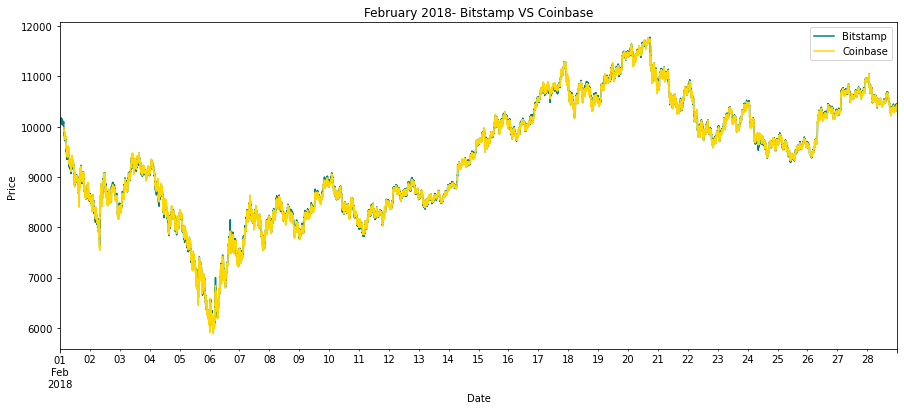

In [24]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period middle in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label

df_bitstamp_sliced['Close'].loc['2018-2-1' : '2018-2-28'].plot(legend=True, figsize=(15, 6), 
                                                               title="February 2018- Bitstamp VS Coinbase", 
                                                               color='teal',
                                                               label="Bitstamp")

df_coinbase_sliced['Close'].loc['2018-02-01':'2018-02-28'].plot(legend=True, 
                                                                figsize=(15, 6), 
                                                                color='gold',
                                                                label="Coinbase", 
                                                                ylabel="Price",
                                                                xlabel="Date")


#For March, prices are very similar

<AxesSubplot:title={'center':'March 2018- Bitstamp VS Coinbase'}, xlabel='Date', ylabel='Price'>

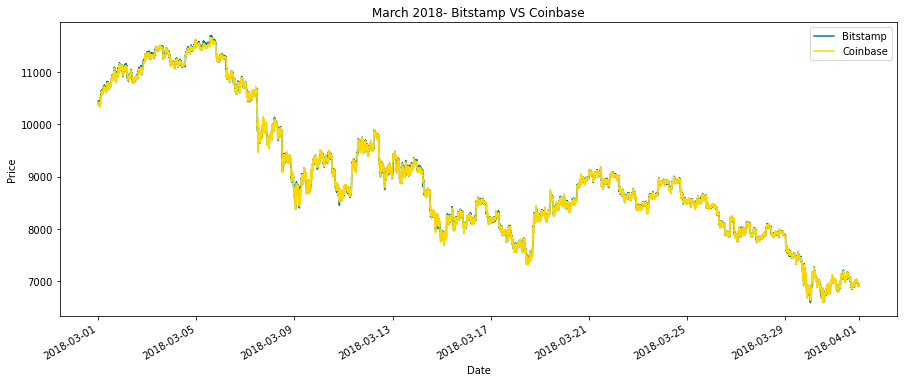

In [25]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
df_bitstamp_sliced['Close'].loc['2018-03-01' :'2018-03-31'].plot(legend=True, 
                                                                 figsize=(15, 6), 
                                                                 title="March 2018- Bitstamp VS Coinbase", 
                                                                 color='teal',
                                                                 label="Bitstamp")

df_coinbase_sliced['Close'].loc['2018-03-01' :'2018-03-31'].plot(legend=True, 
                                                                 figsize=(15, 6), 
                                                                 color='gold',
                                                                 label="Coinbase",
                                                                 ylabel="Price", 
                                                                 xlabel="Date")

#For March, prices are very similar

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** No, with the pass of time the spread between Bitstamp and Coinbase has decrease keeping a short spread that is close to non existent. The biggest spread was in January. The lines show how they dont overlap and Bitstamp had a higher price.

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

<AxesSubplot:title={'center':'January 28th, 2018- Bitstamp VS Coinbase'}, xlabel='Date', ylabel='Price'>

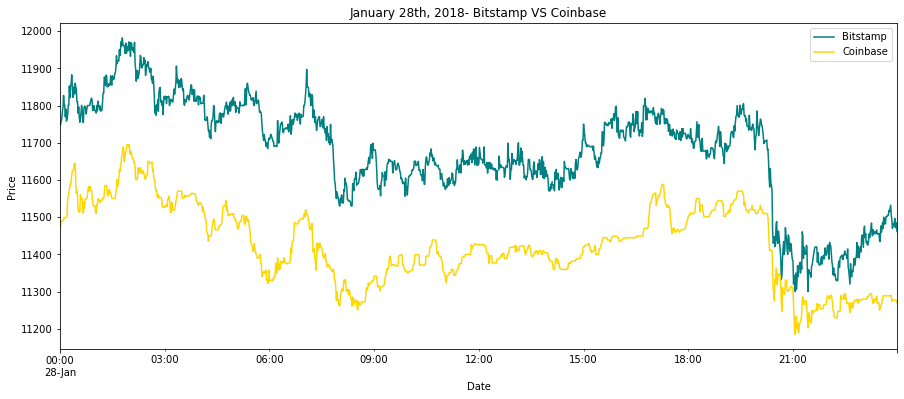

In [26]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
df_bitstamp_sliced['Close'].loc['2018-01-28'].plot(legend=True, figsize=(15, 6), 
                                                   title="January 28th, 2018- Bitstamp VS Coinbase", 
                                                   color='teal',
                                                   label="Bitstamp")

df_coinbase_sliced['Close'].loc['2018-01-28'].plot(legend=True, figsize=(15, 6), 
                                                   color='gold',
                                                   label="Coinbase",
                                                   ylabel="Price", 
                                                   xlabel="Date")

# The graph shows that the price was different, potential arbitrage.

In [27]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = df_bitstamp_sliced['Close'].loc['2018-01-28']- df_coinbase_sliced['Close'].loc['2018-01-28']

# Generate summary statistics for the early DataFrame
arbitrage_spread_early.describe()

count    1436.000000
mean      247.552326
std        68.343472
min        55.030000
25%       210.022500
50%       251.180000
75%       290.925000
max       439.010000
Name: Close, dtype: float64

<AxesSubplot:title={'center':' Arbitrage Spread -Jan/28/2018- Bitstamp VS Coinbase'}>

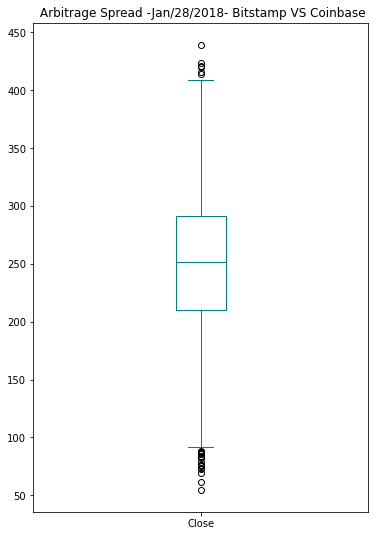

In [28]:
# Visualize the arbitrage spread from early in the dataset in a box plot
arbitrage_spread_early.plot.box(legend=True, figsize=(6, 9),title=" Arbitrage Spread -Jan/28/2018- Bitstamp VS Coinbase", color='teal')

<AxesSubplot:title={'center':'Feb 1st, 2018- Bitstamp VS Coinbase'}, xlabel='Date', ylabel='Price'>

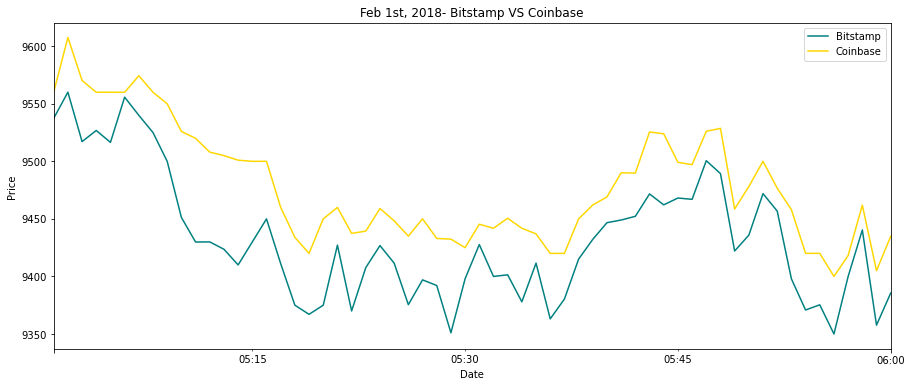

In [29]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
df_bitstamp_sliced['Close'].iloc[44941:45001].plot(legend=True, figsize=(15, 6), 
                                                   title="Feb 1st, 2018- Bitstamp VS Coinbase", 
                                                   color='teal',label="Bitstamp")

df_coinbase_sliced['Close'].iloc[44941:45001].plot(legend=True, figsize=(15, 6), color='gold',
                                                   label="Coinbase",ylabel="Price", xlabel="Date")

# to demostrate 

In [30]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = df_coinbase_sliced['Close'].iloc[44941:45001] - df_bitstamp_sliced['Close'].iloc[44941:45001]

# Generate summary statistics 
arbitrage_spread_middle.describe()

count    60.000000
mean     45.440667
std      18.960519
min       4.260000
25%      32.072500
50%      42.905000
75%      54.600000
max      91.000000
Name: Close, dtype: float64

<AxesSubplot:title={'center':' Arbitrage Spread -Feb/27/2018- Bitstamp VS Coinbase'}>

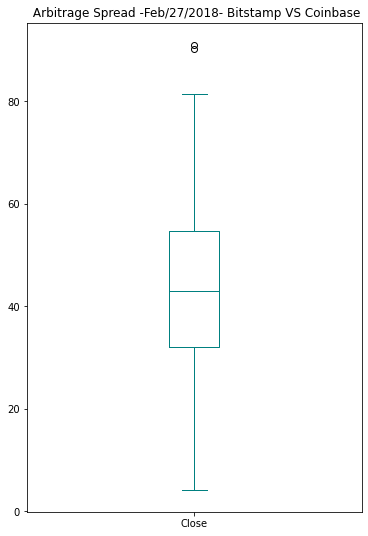

In [31]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_middle.plot.box(legend=True, figsize=(6, 9),title=" Arbitrage Spread -Feb/27/2018- Bitstamp VS Coinbase", color='teal')

<AxesSubplot:title={'center':'Mar 20th, 2018- Bitstamp VS Coinbase'}, xlabel='Date', ylabel='Price'>

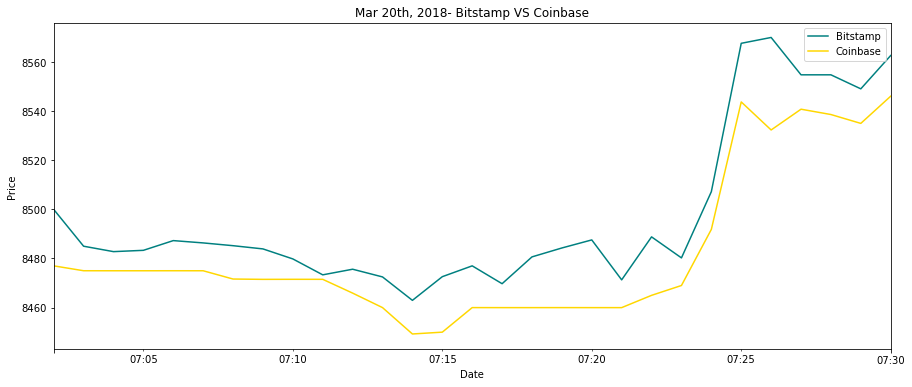

In [32]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
df_bitstamp_sliced['Close'].iloc[112682:112711].plot(legend=True, figsize=(15, 6), 
                                                     title="Mar 20th, 2018- Bitstamp VS Coinbase", 
                                                     color='teal',label="Bitstamp")

df_coinbase_sliced['Close'].iloc[112682:112711].plot(legend=True, figsize=(15, 6), color='gold',
                                                     label="Coinbase",ylabel="Price", xlabel="Date")

In [33]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = df_bitstamp_sliced['Close'].iloc[112682:112711] - df_coinbase_sliced['Close'].iloc[112682:112711]

# Generate summary statistics for the late DataFrame
arbitrage_spread_late.describe()

count    29.000000
mean     15.538966
std       7.392298
min       1.830000
25%      11.240000
50%      13.690000
75%      20.660000
max      37.670000
Name: Close, dtype: float64

<AxesSubplot:title={'center':' Arbitrage Spread -Mar/29/2018- Bitstamp VS Coinbase'}>

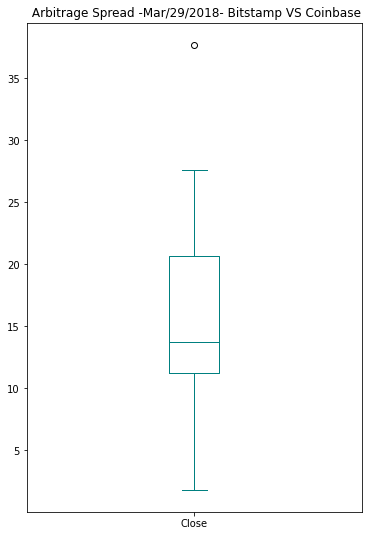

In [34]:
# Visualize the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_late.plot.box(legend=True, figsize=(6, 9),title=" Arbitrage Spread -Mar/29/2018- Bitstamp VS Coinbase", color='teal')

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [35]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
#arbitrage_spread_early = df_coinbase_sliced['Close']-df_bitstamp_sliced['Close'] 

arbitrage_spread_early = df_bitstamp_sliced['Close'].loc['2018-01-28']- df_coinbase_sliced['Close'].loc['2018-01-28']

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
profitable_trades_early = arbitrage_spread_early[arbitrage_spread_early > 0]
profitable_trades_early.describe()

count    1436.000000
mean      247.552326
std        68.343472
min        55.030000
25%       210.022500
50%       251.180000
75%       290.925000
max       439.010000
Name: Close, dtype: float64

In [36]:
# For the date middle in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_middle = df_coinbase_sliced['Close'].iloc[44941:45001] - df_bitstamp_sliced['Close'].iloc[44941:45001]

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
profitable_trades_middle  = arbitrage_spread_middle[arbitrage_spread_middle > 0]
profitable_trades_middle.describe()

count    60.000000
mean     45.440667
std      18.960519
min       4.260000
25%      32.072500
50%      42.905000
75%      54.600000
max      91.000000
Name: Close, dtype: float64

In [37]:
# For the date late in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_late = df_bitstamp_sliced['Close'].iloc[112682:112711]- df_coinbase_sliced['Close'].iloc[112682:112711]

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
profitable_trades_late  = arbitrage_spread_late[arbitrage_spread_late > 0]
profitable_trades_late.describe() 

count    29.000000
mean     15.538966
std       7.392298
min       1.830000
25%      11.240000
50%      13.690000
75%      20.660000
max      37.670000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [38]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_early = (arbitrage_spread_early[arbitrage_spread_early > 0 ])/ df_coinbase_sliced['Close'].loc['2018-01-28']


# Review the spread return DataFrame
spread_return_early.dropna()

#the spread returns are above 1%

Timestamp
2018-01-28 00:00:00    0.023999
2018-01-28 00:01:00    0.023965
2018-01-28 00:02:00    0.023392
2018-01-28 00:03:00    0.023936
2018-01-28 00:04:00    0.025610
                         ...   
2018-01-28 23:55:00    0.019518
2018-01-28 23:56:00    0.017302
2018-01-28 23:57:00    0.018510
2018-01-28 23:58:00    0.017303
2018-01-28 23:59:00    0.017094
Name: Close, Length: 1436, dtype: float64

In [39]:
# For the date middle in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_middle= arbitrage_spread_middle[arbitrage_spread_middle > 0]/df_bitstamp_sliced['Close'].iloc[44941:45001]

# Review the spread return DataFrame
spread_return_middle.dropna()

#the spread returns are not above 1%, will be using .001 to be able to view data and arbitrage,data does not offer points with a spread.

Timestamp
2018-02-01 05:01:00    0.002373
2018-02-01 05:02:00    0.004974
2018-02-01 05:03:00    0.005578
2018-02-01 05:04:00    0.003485
2018-02-01 05:05:00    0.004577
2018-02-01 05:06:00    0.000446
2018-02-01 05:07:00    0.003603
2018-02-01 05:08:00    0.003676
2018-02-01 05:09:00    0.005264
2018-02-01 05:10:00    0.007909
2018-02-01 05:11:00    0.009556
2018-02-01 05:12:00    0.008273
2018-02-01 05:13:00    0.008636
2018-02-01 05:14:00    0.009671
2018-02-01 05:15:00    0.007423
2018-02-01 05:16:00    0.005294
2018-02-01 05:17:00    0.005191
2018-02-01 05:18:00    0.006289
2018-02-01 05:19:00    0.005651
2018-02-01 05:20:00    0.008001
2018-02-01 05:21:00    0.003476
2018-02-01 05:22:00    0.007194
2018-02-01 05:23:00    0.003365
2018-02-01 05:24:00    0.003417
2018-02-01 05:25:00    0.003908
2018-02-01 05:26:00    0.006351
2018-02-01 05:27:00    0.005646
2018-02-01 05:28:00    0.004353
2018-02-01 05:29:00    0.008704
2018-02-01 05:30:00    0.002874
2018-02-01 05:31:00    0.00187

In [40]:
# For the date late in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_late= arbitrage_spread_late[arbitrage_spread_late > 0]/ df_coinbase_sliced['Close'].iloc[112682:112711]

# Review the spread return DataFrame
spread_return_late.dropna()

#the spread returns are not above 1%, will be using .001 to be able to view data and arbitrage,data does not offer points with a spread.

Timestamp
2018-03-20 07:02:00    0.002712
2018-03-20 07:03:00    0.001179
2018-03-20 07:04:00    0.000919
2018-03-20 07:05:00    0.000982
2018-03-20 07:06:00    0.001448
2018-03-20 07:07:00    0.001338
2018-03-20 07:08:00    0.001603
2018-03-20 07:09:00    0.001464
2018-03-20 07:10:00    0.000980
2018-03-20 07:11:00    0.000216
2018-03-20 07:12:00    0.001149
2018-03-20 07:13:00    0.001476
2018-03-20 07:14:00    0.001620
2018-03-20 07:15:00    0.002673
2018-03-20 07:16:00    0.002009
2018-03-20 07:17:00    0.001151
2018-03-20 07:18:00    0.002442
2018-03-20 07:19:00    0.002870
2018-03-20 07:20:00    0.003259
2018-03-20 07:21:00    0.001337
2018-03-20 07:22:00    0.002813
2018-03-20 07:23:00    0.001327
2018-03-20 07:24:00    0.001810
2018-03-20 07:25:00    0.002794
2018-03-20 07:26:00    0.004415
2018-03-20 07:27:00    0.001639
2018-03-20 07:28:00    0.001894
2018-03-20 07:29:00    0.001649
2018-03-20 07:30:00    0.001938
Name: Close, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [41]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early > .01]

# Review the first five profitable trades
profitable_trades_early.head()

Timestamp
2018-01-28 00:00:00    0.023999
2018-01-28 00:01:00    0.023965
2018-01-28 00:02:00    0.023392
2018-01-28 00:03:00    0.023936
2018-01-28 00:04:00    0.025610
Name: Close, dtype: float64

In [42]:
# For the date middle in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_middle = spread_return_middle[spread_return_middle > .001]

# Review the first five profitable trades
profitable_trades_middle.head()

Timestamp
2018-02-01 05:01:00    0.002373
2018-02-01 05:02:00    0.004974
2018-02-01 05:03:00    0.005578
2018-02-01 05:04:00    0.003485
2018-02-01 05:05:00    0.004577
Name: Close, dtype: float64

In [43]:
# For the date late in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_late = spread_return_late[spread_return_late > .001]

# Review the first five profitable trades
profitable_trades_late.head()

Timestamp
2018-03-20 07:02:00    0.002712
2018-03-20 07:03:00    0.001179
2018-03-20 07:06:00    0.001448
2018-03-20 07:07:00    0.001338
2018-03-20 07:08:00    0.001603
Name: Close, dtype: float64

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [44]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_early.describe()

count    1378.000000
mean        0.022201
std         0.005421
min         0.010087
25%         0.019016
50%         0.022191
75%         0.025413
max         0.038510
Name: Close, dtype: float64

In [45]:
# For the date middle in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_middle.describe()

count    59.000000
mean      0.004896
std       0.001954
min       0.001873
25%       0.003446
50%       0.004577
75%       0.005880
max       0.009671
Name: Close, dtype: float64

In [46]:
# For the date late in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_late.describe()

count    25.000000
mean      0.002000
std       0.000805
min       0.001149
25%       0.001448
50%       0.001649
75%       0.002673
max       0.004415
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [47]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early*df_bitstamp_sliced['Close'].loc['2018-01-28']

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()

# View the early profit DataFrame
profit_per_trade_early

Timestamp
2018-01-28 00:00:00    281.988859
2018-01-28 00:01:00    281.590414
2018-01-28 00:02:00    275.056978
2018-01-28 00:03:00    281.613252
2018-01-28 00:04:00    301.796040
                          ...    
2018-01-28 23:55:00    224.395832
2018-01-28 23:56:00    198.485719
2018-01-28 23:57:00    212.603835
2018-01-28 23:58:00    198.496065
2018-01-28 23:59:00    195.922778
Name: Close, Length: 1378, dtype: float64

In [48]:
# For the date middle in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_middle =profitable_trades_middle*df_coinbase_sliced['Close'].iloc[44941:45001]

# Drop any missing values from the profit DataFrame
profit_per_trade_middle = profit_middle.dropna()

# View the early profit DataFrame
profit_per_trade_middle

Timestamp
2018-02-01 05:01:00    22.683696
2018-02-01 05:02:00    47.786505
2018-02-01 05:03:00    53.386155
2018-02-01 05:04:00    33.315699
2018-02-01 05:05:00    43.759389
2018-02-01 05:07:00    34.493826
2018-02-01 05:08:00    35.138682
2018-02-01 05:09:00    50.273263
2018-02-01 05:10:00    75.341198
2018-02-01 05:11:00    90.971072
2018-02-01 05:12:00    78.655341
2018-02-01 05:13:00    82.082777
2018-02-01 05:14:00    91.880021
2018-02-01 05:15:00    70.519618
2018-02-01 05:16:00    50.294868
2018-02-01 05:17:00    49.103563
2018-02-01 05:18:00    59.330803
2018-02-01 05:19:00    53.229088
2018-02-01 05:20:00    75.610160
2018-02-01 05:21:00    32.883912
2018-02-01 05:22:00    67.894964
2018-02-01 05:23:00    31.766546
2018-02-01 05:24:00    32.320057
2018-02-01 05:25:00    36.923736
2018-02-01 05:26:00    59.918116
2018-02-01 05:27:00    53.359602
2018-02-01 05:28:00    41.057934
2018-02-01 05:29:00    82.098408
2018-02-01 05:30:00    27.087627
2018-02-01 05:31:00    17.693081


In [49]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_late = profitable_trades_late*df_bitstamp_sliced['Close'].iloc[112682:112711]

# Drop any missing values from the profit DataFrame
profit_per_trade_late = profit_late.dropna()

# View the early profit DataFrame
profit_per_trade_late

Timestamp
2018-03-20 07:02:00    23.052350
2018-03-20 07:03:00    10.001776
2018-03-20 07:06:00    12.287764
2018-03-20 07:07:00    11.355174
2018-03-20 07:08:00    13.601769
2018-03-20 07:09:00    12.418150
2018-03-20 07:12:00     9.741183
2018-03-20 07:13:00    12.508440
2018-03-20 07:14:00    13.712181
2018-03-20 07:15:00    22.650391
2018-03-20 07:16:00    17.034161
2018-03-20 07:17:00     9.751214
2018-03-20 07:18:00    20.710453
2018-03-20 07:19:00    24.349683
2018-03-20 07:20:00    27.659847
2018-03-20 07:21:00    11.325120
2018-03-20 07:22:00    23.876972
2018-03-20 07:23:00    11.254918
2018-03-20 07:24:00    15.397819
2018-03-20 07:25:00    23.936689
2018-03-20 07:26:00    37.836312
2018-03-20 07:27:00    14.022949
2018-03-20 07:28:00    16.200622
2018-03-20 07:29:00    14.093194
2018-03-20 07:30:00    16.592089
Name: Close, dtype: float64

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [50]:
# Generate the summary statistics for the early profit per trade DataFrame
profit_per_trade_early.describe()

count    1378.000000
mean      259.905405
std        64.817688
min       115.121956
25%       221.411421
50%       259.796909
75%       300.417942
max       455.916136
Name: Close, dtype: float64

<AxesSubplot:title={'center':'January Bitcoin Profits'}, xlabel='Timestamp'>

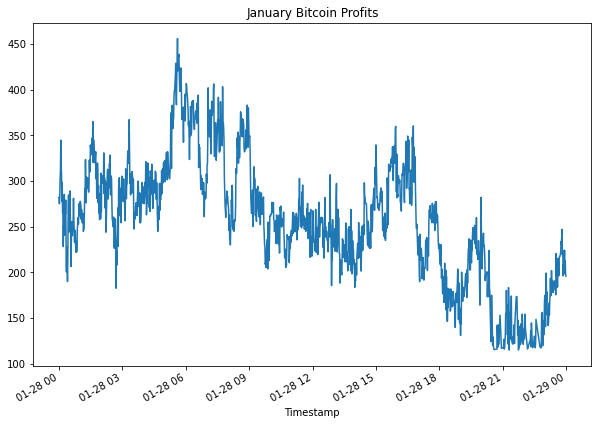

In [51]:
# Plot the results for the early profit per trade DataFrame
profit_per_trade_early.plot(figsize=(10, 7), title="January Bitcoin Profits")

In [52]:
# Generate the summary statistics for the middle profit per trade DataFrame
profit_per_trade_middle.describe()

count    59.000000
mean     46.399730
std      18.531402
min      17.693081
25%      32.601984
50%      43.759389
75%      55.685792
max      91.880021
Name: Close, dtype: float64

<AxesSubplot:title={'center':'February Bitcoin Profits'}, xlabel='Timestamp'>

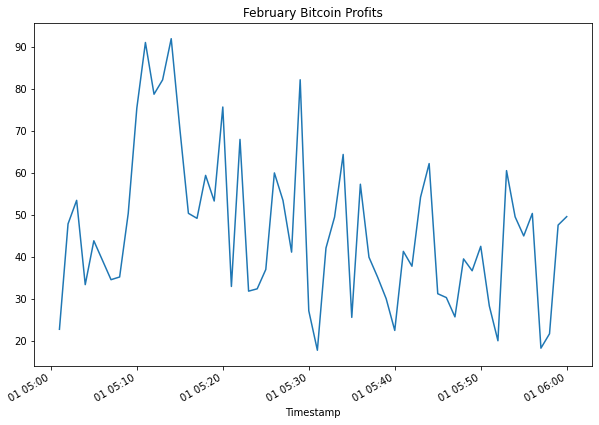

In [53]:
# Plot the results for the middle profit per trade DataFrame
profit_per_trade_middle.plot(figsize=(10, 7), title="February Bitcoin Profits")

In [54]:
# Generate the summary statistics for the late profit per trade DataFrame
profit_per_trade_late.describe()

count    25.000000
mean     17.014849
std       6.883656
min       9.741183
25%      12.287764
50%      14.093194
75%      22.650391
max      37.836312
Name: Close, dtype: float64

<AxesSubplot:title={'center':'March Bitcoin Profits'}, xlabel='Timestamp'>

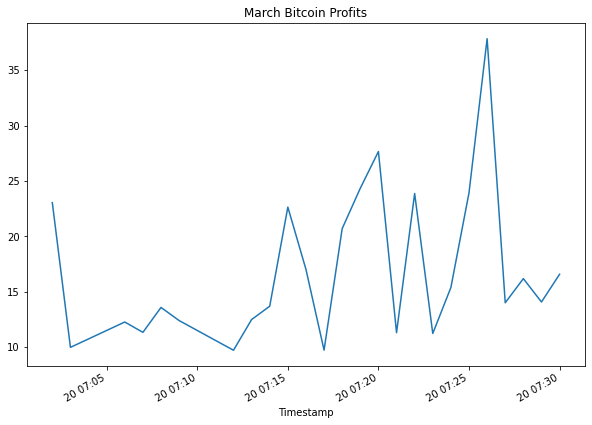

In [55]:
# Plot the results for the late profit per trade DataFrame
profit_per_trade_late.plot(figsize=(10, 7), title="March Bitcoin Profits")

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [56]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
cumulative_profit_early = profit_per_trade_early.sum()
cumulative_profit_early

358149.64796729136

In [57]:
# Calculate the sum of the potential profits for the middle profit per trade DataFrame
cumulative_profit_middle = profit_per_trade_middle.sum()
cumulative_profit_middle

2737.584096823517

In [58]:
# Calculate the sum of the potential profits for the late profit per trade DataFrame
cumulative_profit_late = profit_per_trade_late.sum()
cumulative_profit_late

425.3712199801155

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [59]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_per_trade_early.cumsum()
cumulative_profit_early

Timestamp
2018-01-28 00:00:00       281.988859
2018-01-28 00:01:00       563.579273
2018-01-28 00:02:00       838.636251
2018-01-28 00:03:00      1120.249503
2018-01-28 00:04:00      1422.045543
                           ...      
2018-01-28 23:55:00    357344.139571
2018-01-28 23:56:00    357542.625290
2018-01-28 23:57:00    357755.229124
2018-01-28 23:58:00    357953.725189
2018-01-28 23:59:00    358149.647967
Name: Close, Length: 1378, dtype: float64

<AxesSubplot:title={'center':'Cumulative Jan Bitcoin Profits'}, xlabel='Timestamp'>

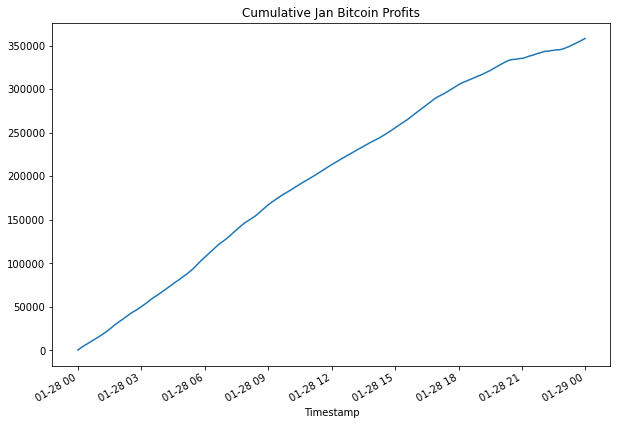

In [60]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_early.plot(figsize=(10, 7), title="Cumulative Jan Bitcoin Profits")

In [61]:
# Use the cumsum function to calculate the cumulative profits over time for the middle profit per trade DataFrame
cumulative_profit_middle = profit_per_trade_middle.cumsum()
cumulative_profit_middle

Timestamp
2018-02-01 05:01:00      22.683696
2018-02-01 05:02:00      70.470201
2018-02-01 05:03:00     123.856356
2018-02-01 05:04:00     157.172054
2018-02-01 05:05:00     200.931443
2018-02-01 05:07:00     235.425268
2018-02-01 05:08:00     270.563951
2018-02-01 05:09:00     320.837214
2018-02-01 05:10:00     396.178412
2018-02-01 05:11:00     487.149484
2018-02-01 05:12:00     565.804825
2018-02-01 05:13:00     647.887602
2018-02-01 05:14:00     739.767623
2018-02-01 05:15:00     810.287242
2018-02-01 05:16:00     860.582110
2018-02-01 05:17:00     909.685673
2018-02-01 05:18:00     969.016476
2018-02-01 05:19:00    1022.245565
2018-02-01 05:20:00    1097.855725
2018-02-01 05:21:00    1130.739637
2018-02-01 05:22:00    1198.634600
2018-02-01 05:23:00    1230.401147
2018-02-01 05:24:00    1262.721203
2018-02-01 05:25:00    1299.644939
2018-02-01 05:26:00    1359.563055
2018-02-01 05:27:00    1412.922657
2018-02-01 05:28:00    1453.980590
2018-02-01 05:29:00    1536.078998
2018-02-01

<AxesSubplot:title={'center':'Cumulative Feb Bitcoin Profits'}, xlabel='Timestamp'>

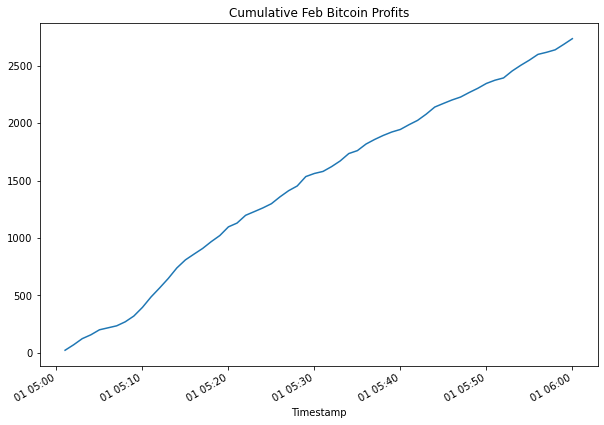

In [62]:
# Plot the cumulative sum of profits for the middle profit per trade DataFrame
cumulative_profit_middle.plot(figsize=(10, 7), title="Cumulative Feb Bitcoin Profits")

In [63]:
# Use the cumsum function to calculate the cumulative profits over time for the late profit per trade DataFrame
cumulative_profit_late = profit_per_trade_late.cumsum()
cumulative_profit_late

Timestamp
2018-03-20 07:02:00     23.052350
2018-03-20 07:03:00     33.054126
2018-03-20 07:06:00     45.341890
2018-03-20 07:07:00     56.697064
2018-03-20 07:08:00     70.298832
2018-03-20 07:09:00     82.716983
2018-03-20 07:12:00     92.458165
2018-03-20 07:13:00    104.966605
2018-03-20 07:14:00    118.678786
2018-03-20 07:15:00    141.329178
2018-03-20 07:16:00    158.363339
2018-03-20 07:17:00    168.114552
2018-03-20 07:18:00    188.825006
2018-03-20 07:19:00    213.174689
2018-03-20 07:20:00    240.834536
2018-03-20 07:21:00    252.159656
2018-03-20 07:22:00    276.036628
2018-03-20 07:23:00    287.291546
2018-03-20 07:24:00    302.689365
2018-03-20 07:25:00    326.626054
2018-03-20 07:26:00    364.462366
2018-03-20 07:27:00    378.485315
2018-03-20 07:28:00    394.685937
2018-03-20 07:29:00    408.779131
2018-03-20 07:30:00    425.371220
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Cumulative Mar Bitcoin Profits'}, xlabel='Timestamp'>

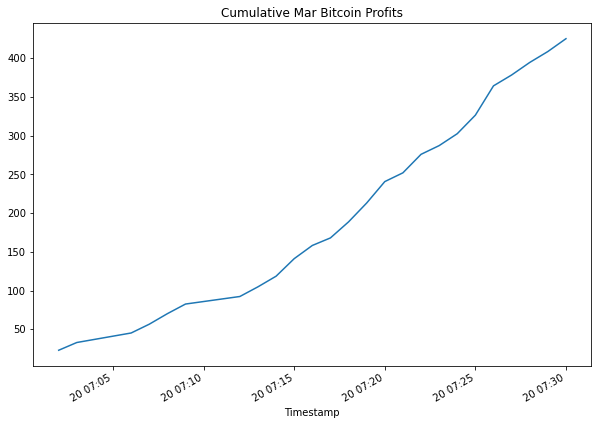

In [64]:
# Plot the cumulative sum of profits for the late profit per trade DataFrame
cumulative_profit_late.plot(figsize=(10, 7), title="Cumulative Mar Bitcoin Profits")

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** After looking at the data, finding arbitrage opportunity is difficult. If found, the profits can quickly add up. In this project selecting the data to find arbitrage had to be based on not only days but also hours. This had to be done because arbitrage was only available at the hour scale. Late January, a spread was created and Bitstamp had a higher price, resulting on opportunity to buy from Coinbaase at a lower level then sell at Bitstamp. This event diminished in February and March. To find opportunity for arbitrage, I had to focus on not just prices from day to day, but prices from hour to hour. The spread was minimal in both Feb and Mar.